<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/08_AnalisiEsplorativaBivariata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisi Esplorativa Bivariata

In questo notebook si effettua uno studio di analisi esplorativa bivariata prendendo come riferimento il dataset "Telco Customer Churn" disponibile sul portale kaggle. Il dataset è scaricabile all'indirizzo:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

e contiene i dati di abbandono di clienti di una ipotetica società dal nome Telco, operante nel settore telecomunicazioni, che ha fornito servizi di telefonia domestica e Internet a 7043 clienti in California in un certo periodo.

##Contenuto del dataset
Ogni riga rappresenta un cliente, ogni colonna contiene gli attributi del cliente, che includono varie informazioni.
* Informazioni generali sui clienti:
  * identificativo (Colonna "customerID");
  * genere (colonna "gender");
  * fascia d'età (colonna "SeniorCitizen");
  * presenza di partner (colonna "Partner");
  * presenza di persone a carico (colonna "Dependents").
* Informazioni sull'account del cliente:
  * da quanto tempo è cliente (colonna "tenure");
  * tipologia di contratto (colonna "Contract");
  * metodo di pagamento (colonna "PaymentMethod");
  * fattura cartacea o meno (colonna "PaperlessBilling");
  * spesa mensile (colonna "MonthlyCharges");
  * spesa complessiva (colonna "TotalCharges").
* Servizi sottoscritti da ciascun cliente:
  * telefono (Colonna "PhoneService");
  * linee multiple (Colonna ("MultipleLines");
  * tipologia connessione Internet (Colonna ("InternetService");
  * sicurezza online (Colonna ("OnlineSecurity");
  * backup online (Colonna ("OnlineBackup");
  * protezione dei dispositivi (Colonna ("DeviceProtection");
  * assistenza tecnica  (Colonna ("TechSupport");
  * servizi di streaming  (Colonna ("StreamingMovies").
* Abbandono eventuale dell'azienda nell'ultimo mese (Colonna "Churn").

## Azioni preliminari

Importazione librerie necessarie e montaggio del Drive per accedere ai file necessari.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [77]:
# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

## Caricamento del dataset e ispezione preliminare

In [78]:
# Caricamento del dataset
file_path = os.path.join(folder_path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(file_path)

# Ispezione preliminare
print("\nDimensioni del dataset:", df.shape)
print("\nPrime righe del dataset:\n", df.head())
print("\nPanoramica sintetica del DataFrame:\n")
print(df.info())
print("\nValori mancanti per colonna:\n", df.isnull().sum())


Dimensioni del dataset: (7043, 21)

Prime righe del dataset:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   


Osserviamo che la variabile 'TotalCharges' è di tipo `object`. In realtà, trattandosi di un valore numerico, in particolare decimale, è preferibile convertirla in `float64`, così come la variabile 'MonthlyCharges'. Analogamente, la variabile 'SeniorCitizen' è di tipo `int64`, ma contiene solo valori 0/1. Pertanto, è preferibile convertirla in `object`.

Successivamente, definiamo due diversi sottoinsiemi del dataset, per differenziare le variabili numeriche (tipo di dato `int64` e `float64`) da quelle categoriche (tipo di dato `object`).

In [79]:
# Conversione di TotalCharges in float64
# L'istruzione errors='coerce' gestisce la presenza di eventuali valori non
# convertibili direttamente in float64 (ad esempio, valori non numerici o
# stringhe), trasformandoli in NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Conversione di SeniorCitizen in object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Verifichiamo la presenza di NaN nelle colonne appena convertite
print("\n Valori NaN nella colonna 'TotalCharges':\n", df['TotalCharges'].isna().sum())
print("\n Valori NaN nella colonna 'SeniorCitizen':\n", df['SeniorCitizen'].isna().sum())


 Valori NaN nella colonna 'TotalCharges':
 11

 Valori NaN nella colonna 'SeniorCitizen':
 0


Dato che si tratta di pochi valori (11 su 7043), optiamo per la rimozione delle osservazioni interessate.

In [ ]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [80]:
# Distinzione tra variabili numeriche e categoriche
numeriche = df.select_dtypes(include=['int64', 'float64']).columns
categoriche = df.select_dtypes(include=['object']).columns

print("\n Variabili Numeriche:", list(numeriche))
print("\n Variabili Categoriche:", list(categoriche))


 Variabili Numeriche: ['tenure', 'MonthlyCharges', 'TotalCharges']

 Variabili Categoriche: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Analisi per le variabili numeriche

Per questo dataset le variabili numeriche sono 'tenure', 'MonthlyCharges' e 'TotalCharges'.

Visualizziamo gli scatter plot per le diverse coppie di variabili. In questo caso, la visualizzazione grafica può essere particolarmente utile per individuare eventuali correlazioni tra l'anzianità dei clienti (colonna 'tenure') e la spesa mensile o complessiva.

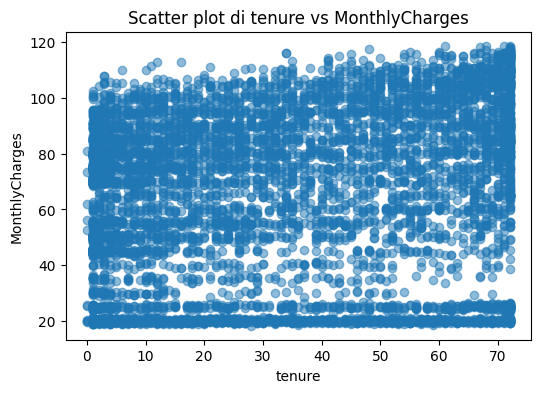

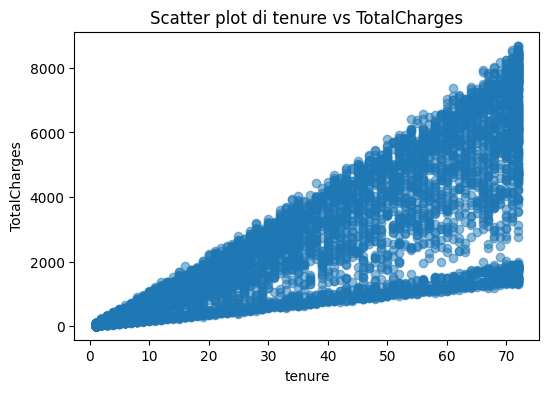

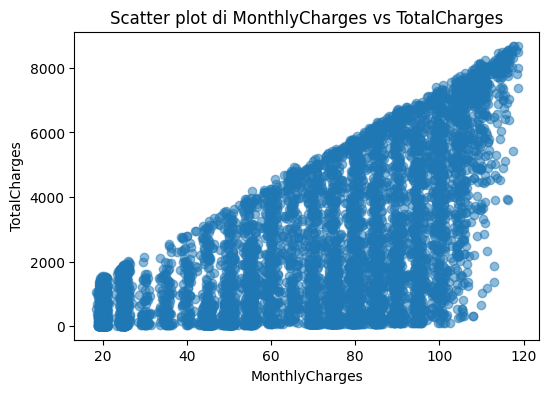

In [81]:
# Scatter plot per variabili numeriche a coppie
for i in range(len(numeriche)):
  for j in range(i + 1, len(numeriche)):
    plt.figure(figsize=(6, 4))
    plt.scatter(df[numeriche[i]], df[numeriche[j]], alpha=0.5)
    plt.xlabel(numeriche[i])
    plt.ylabel(numeriche[j])
    plt.title(f'Scatter plot di {numeriche[i]} vs {numeriche[j]}')
    plt.show()

Dall'analisi dei grafici sembra ipotizzabile una correlazione lineare positiva tra 'tenure' e 'TotalCharges', e tra 'MonthlyCharges' e 'TotalCharges', più marcata nel primo caso rispetto al secondo.

Calcoliamo ora gli indici di correlazione di Pearson e di Spearman.

In [82]:
# Calcolo delle correlazioni di Pearson e Spearman
pearson_corr = df[numeriche].corr(method='pearson')
spearman_corr = df[numeriche].corr(method='spearman')

print("Correlazione di Pearson:\n", pearson_corr, "\n")
print("Correlazione di Spearman:\n", spearman_corr, "\n")

Correlazione di Pearson:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000 

Correlazione di Spearman:
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.276417      0.889177
MonthlyCharges  0.276417        1.000000      0.638032
TotalCharges    0.889177        0.638032      1.000000 



I valori dell'indice di Pearson confermano l'ipotesi precedente. Anche i valori dell'indice di Spearman vanno nella stessa direzione.

## Analisi per le variabili categoriche

Le variabili categoriche sono: 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'.

Consideriamo 'Churn' come variabile di risposta (dipendente) ed analizziamone il legame con le altre variabili (esplicative o indipendenti).

### Diagrammi a barre sovrapposte
Per ogni variabile categorica (diversa da 'customerID' e 'Churn') costruiamo il diagramma a barre sovrapposte rispetto a 'Churn'.

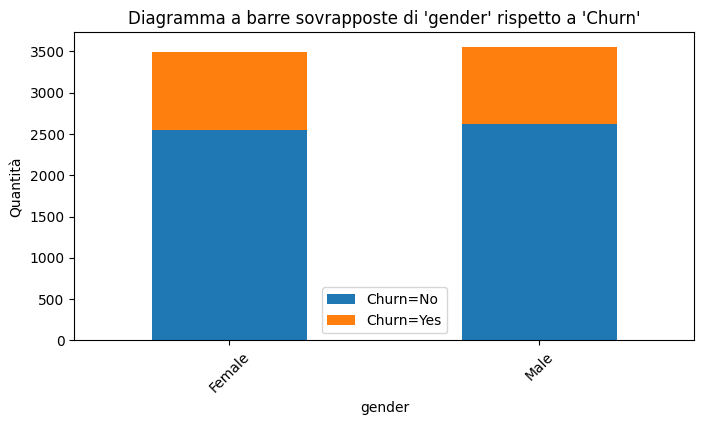

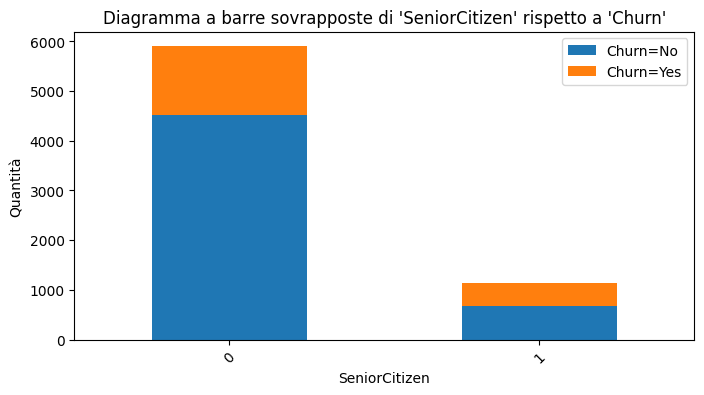

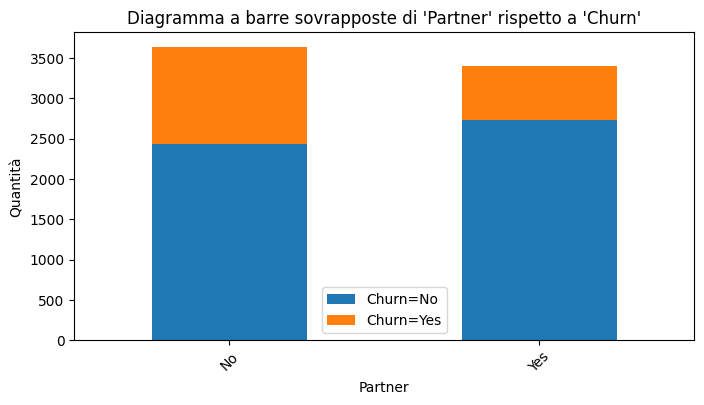

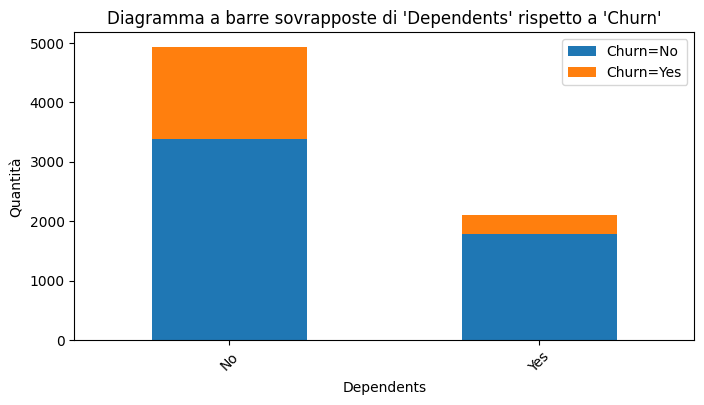

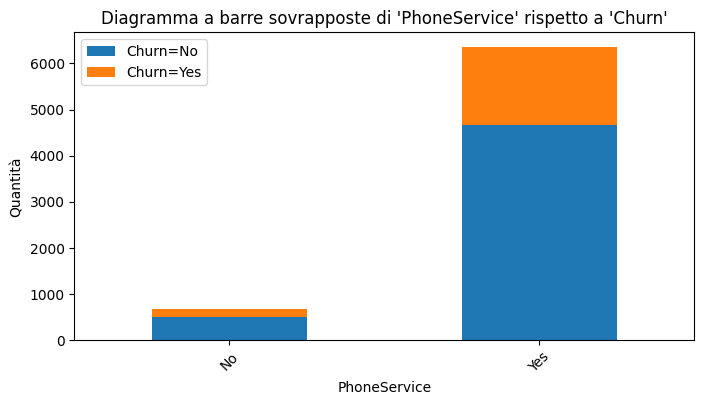

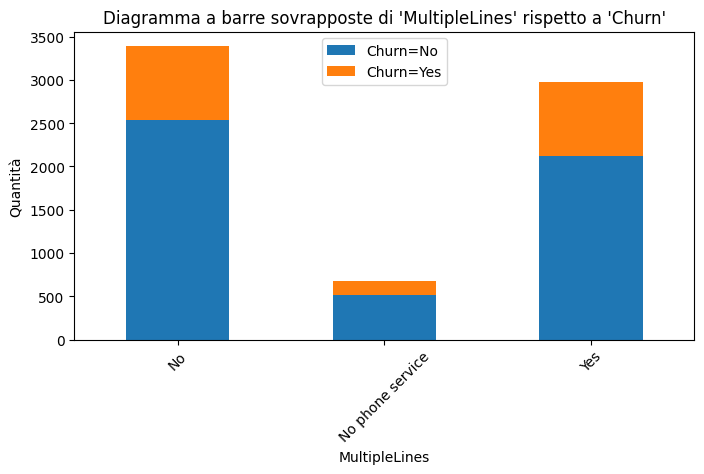

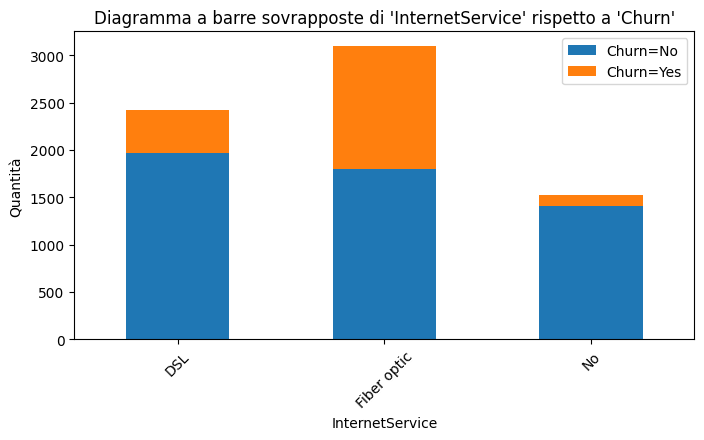

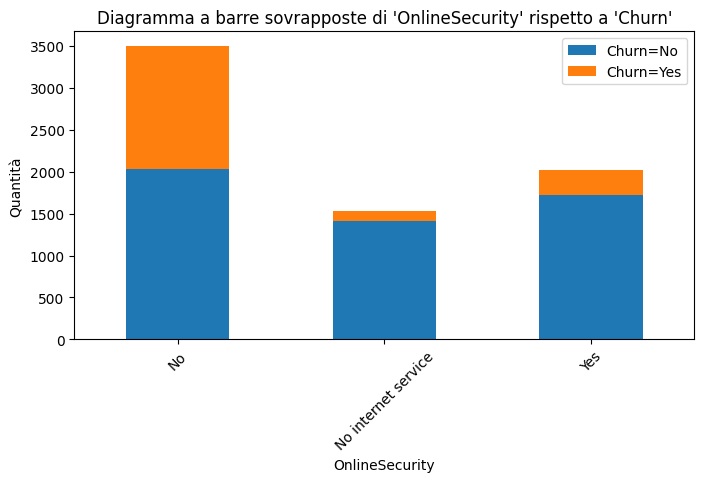

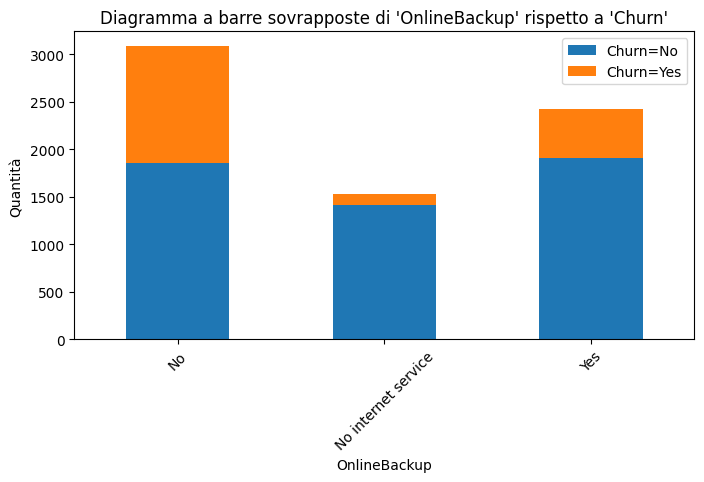

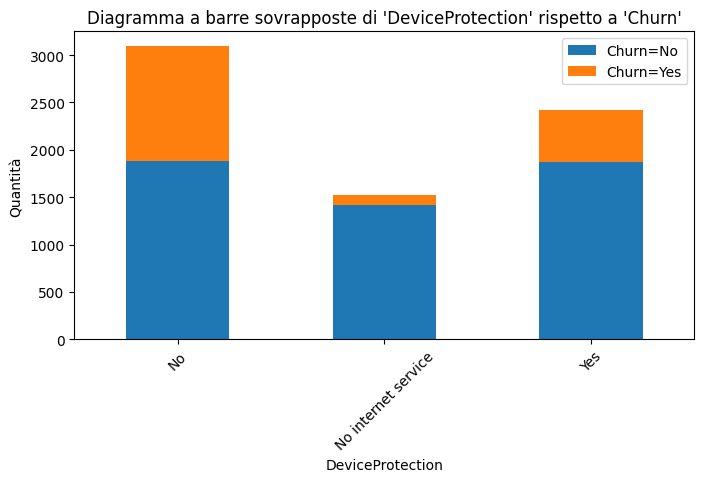

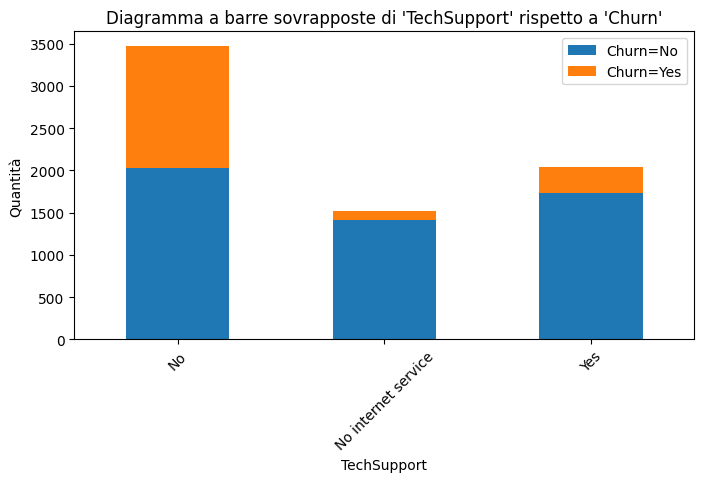

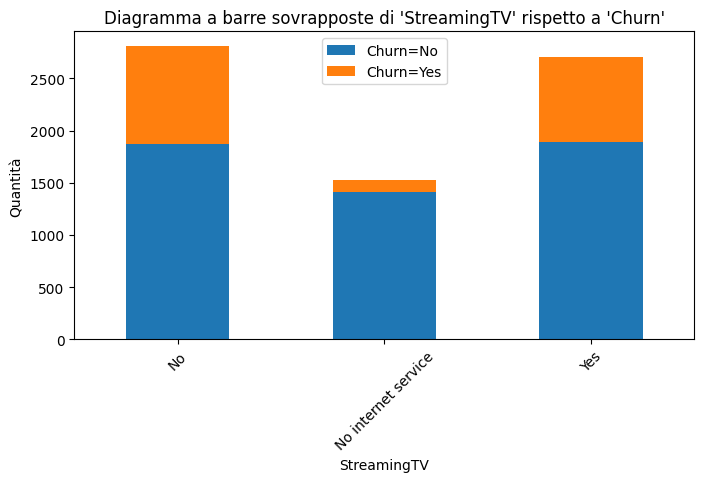

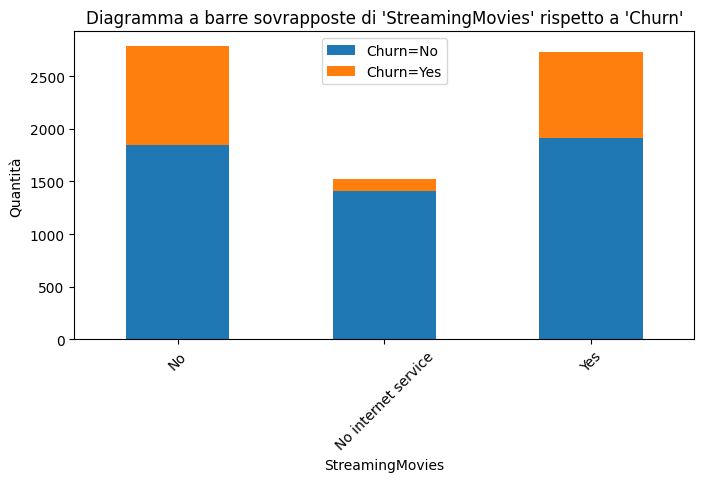

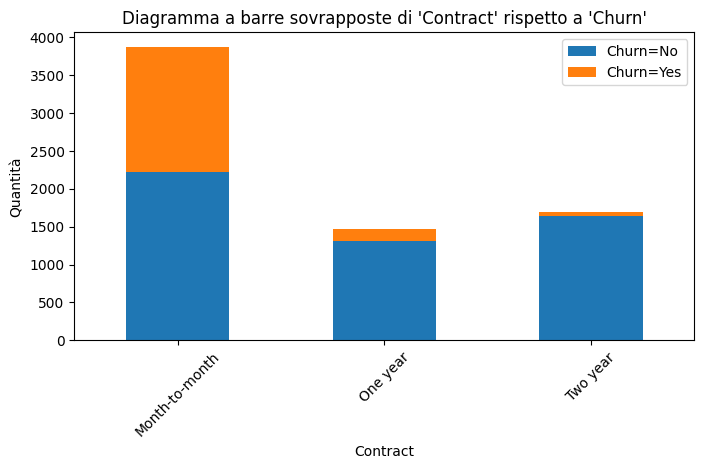

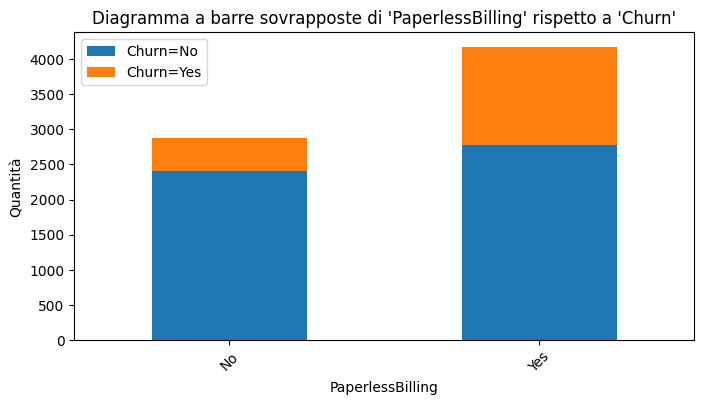

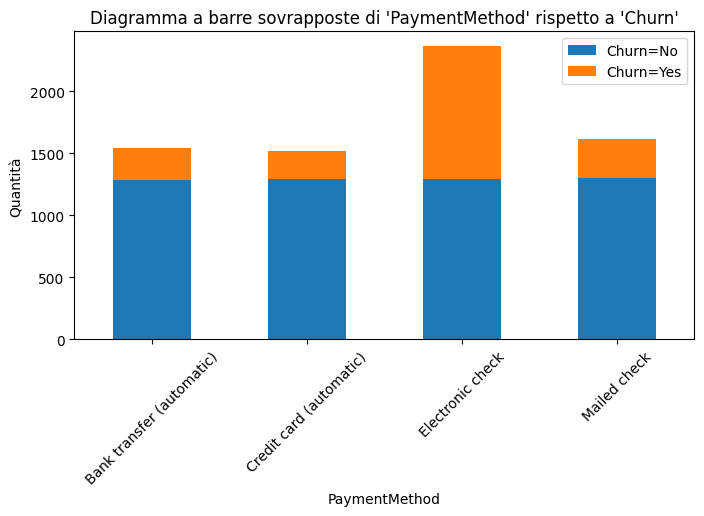

In [83]:
for feature in categoriche:
  if feature in ['customerID', 'Churn']:
    continue  # Salta questa iterazione
  cross_tab = pd.crosstab(df[feature], df['Churn'])#, normalize='index')
  cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))
  plt.title(f"Diagramma a barre sovrapposte di '{feature}' rispetto a 'Churn'")
  plt.ylabel('Quantità')
  plt.xlabel(feature)
  plt.legend(['Churn=No', 'Churn=Yes'])
  plt.xticks(rotation=45)
  plt.show()

### Diagrammi a barre raggruppate

Per ogni variabile categorica (diversa da 'customerID' e 'Churn') costruiamo il diagramma a barre raggruppate rispetto a 'Churn'.

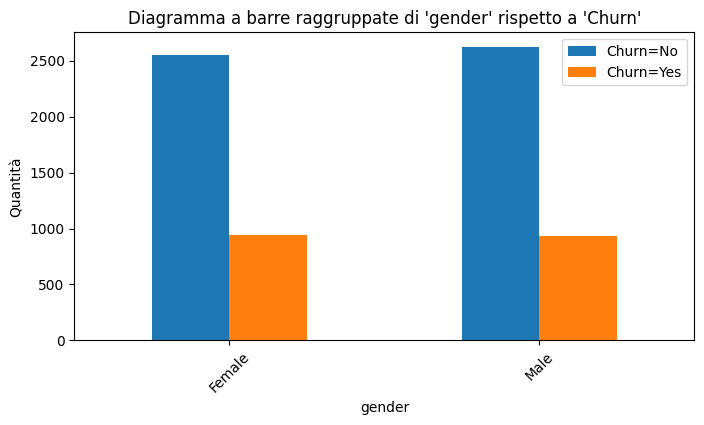

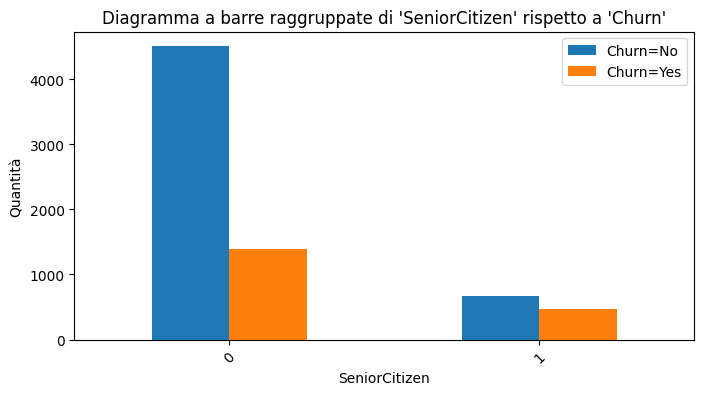

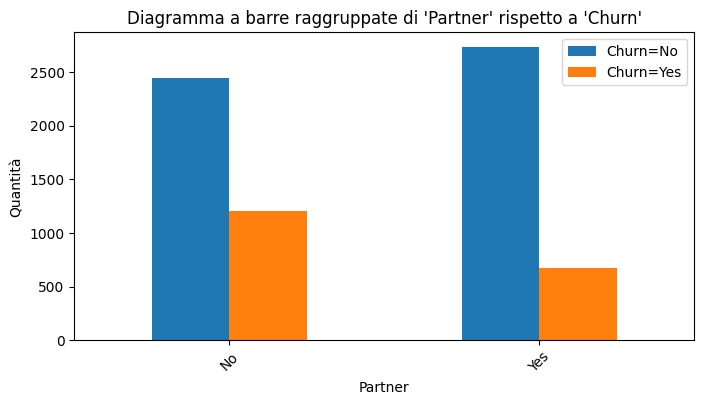

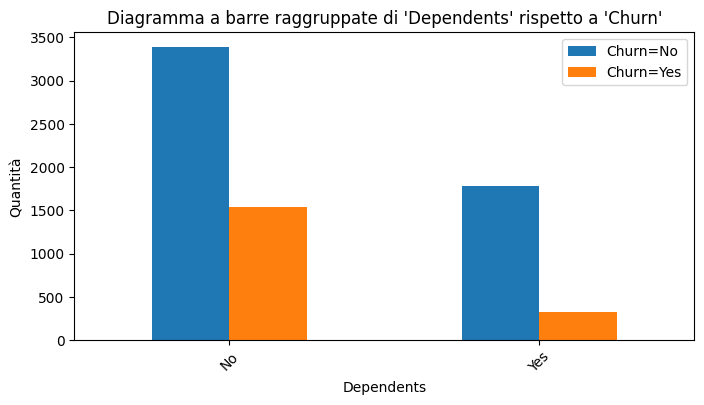

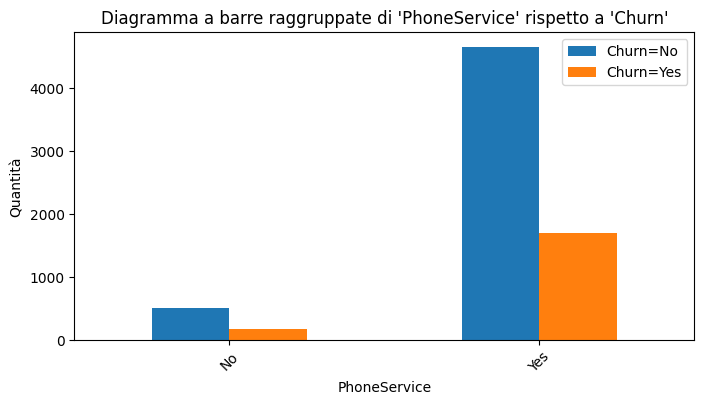

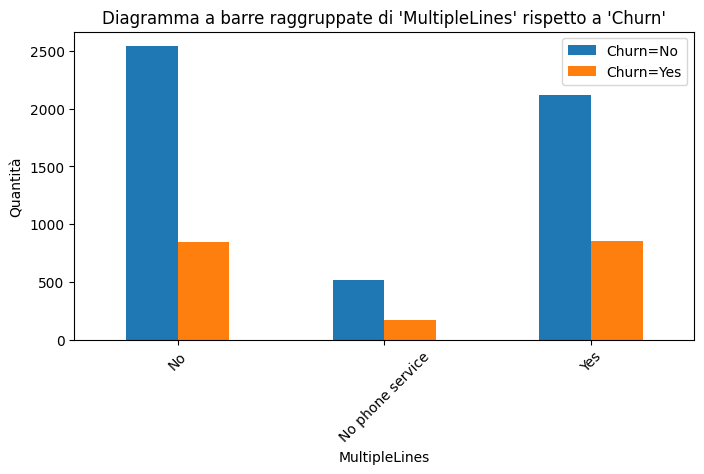

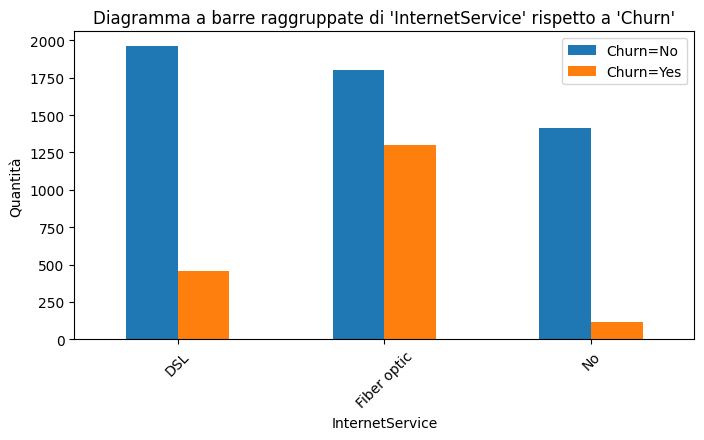

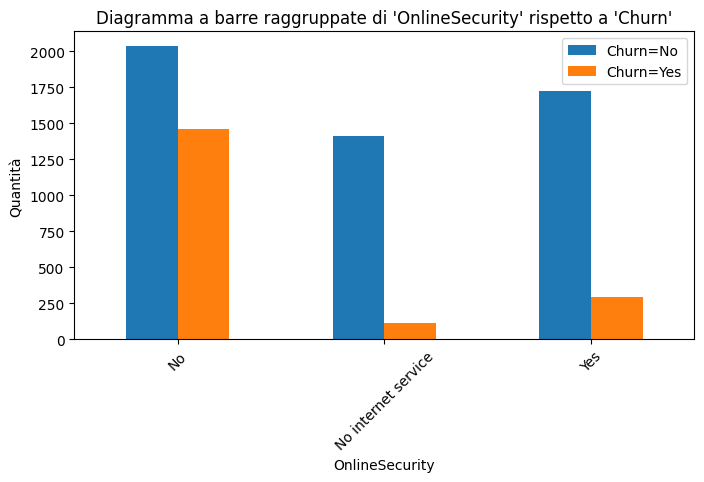

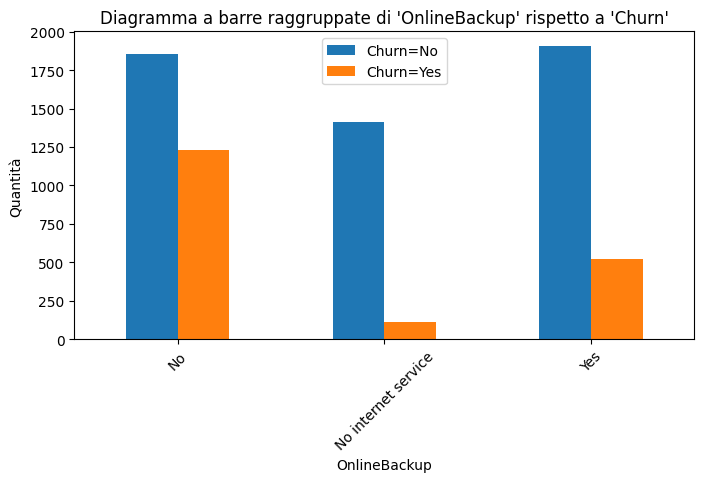

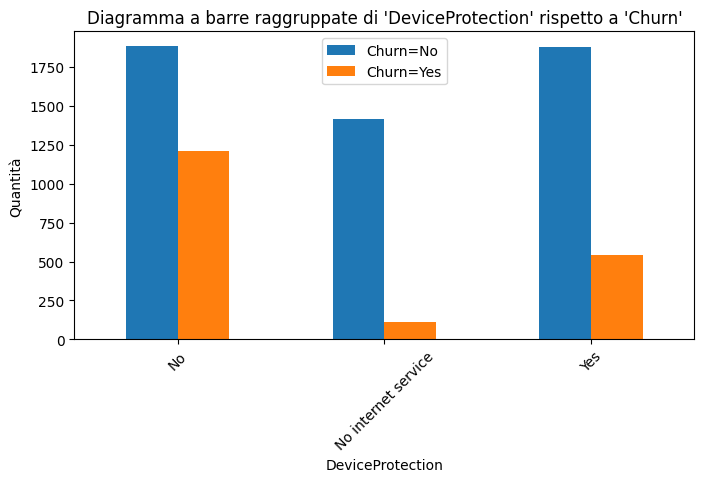

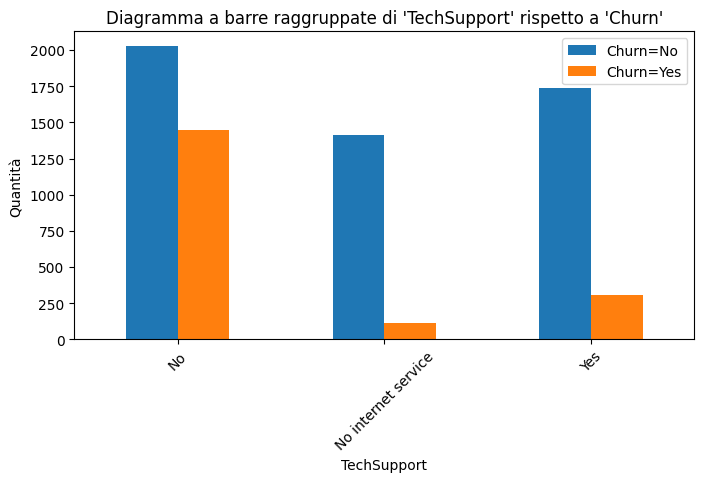

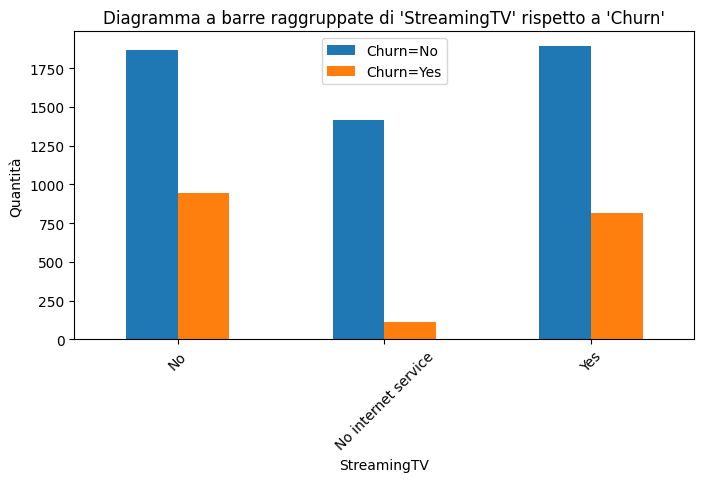

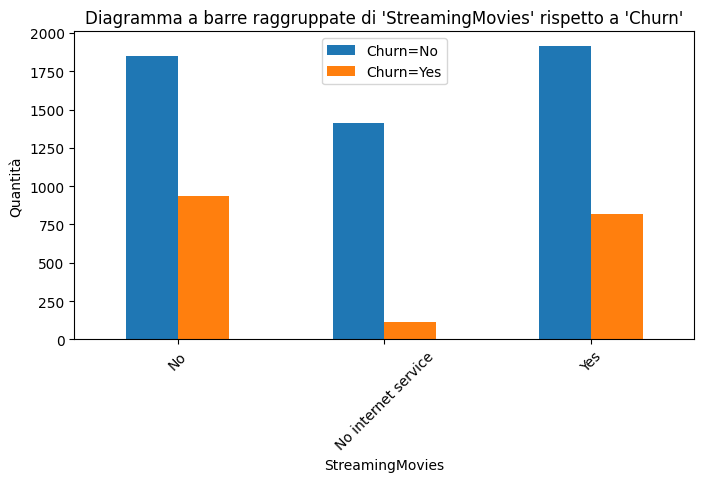

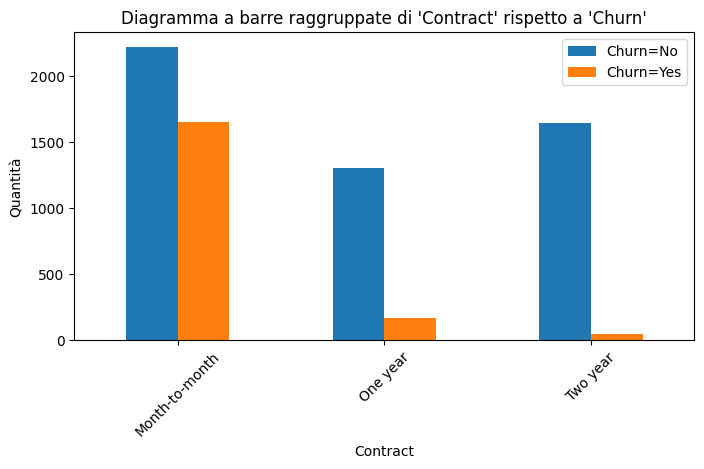

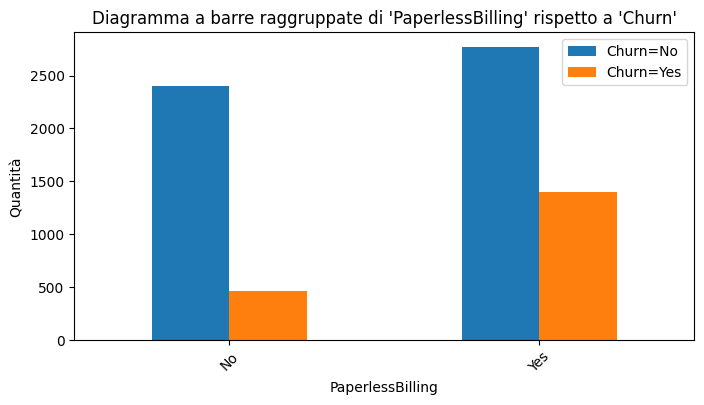

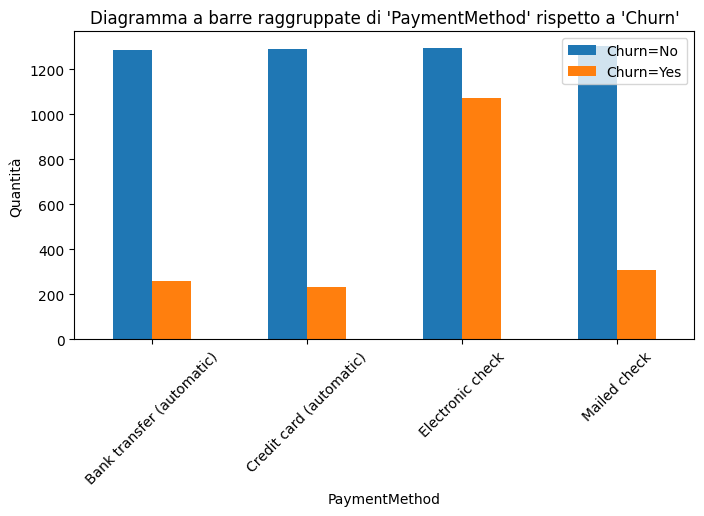

In [84]:
for feature in categoriche:
  if feature in ['customerID', 'Churn']:
    continue  # Salta questa iterazione

  cross_tab = pd.crosstab(df[feature], df['Churn'])#, normalize='index')
  cross_tab.plot(kind='bar', figsize=(8, 4))
  plt.title(f"Diagramma a barre raggruppate di '{feature}' rispetto a 'Churn'")
  plt.ylabel('Quantità')
  plt.xlabel(feature)
  plt.legend(['Churn=No', 'Churn=Yes'])
  plt.xticks(rotation=45)
  plt.show()

### Tabelle di contingenza e odds ratio

Costruiamo le tabelle di contingenza tra le diverse variabili categoriche e 'Churn'. Laddove la variabile categorica sia binaria, calcoliamo anche l'odds ratio.

In [86]:
df['Churn'] = pd.Categorical(df['Churn'], categories=['Yes', 'No'], ordered=True)

for feature in categoriche:
  if feature in ['customerID', 'Churn']:
    continue  # Salta questa iterazione

  # Tabella di contingenza
  tabella_di_contingenza = pd.crosstab(df[feature], df['Churn'], normalize='all')
  print(f"Tabella di contingenza a due vie per {feature}:\n", tabella_di_contingenza, "\n")

  # Calcolo dell'Odds Ratio
  if tabella_di_contingenza.shape == (2,2):
      (A, B), (C, D) = tabella_di_contingenza.to_numpy()
      odds_ratio = (A * D) / (B * C) if (B * C) != 0 else np.nan
      print(f"Odds Ratio per {feature}: {odds_ratio}\n")

Tabella di contingenza a due vie per gender:
 Churn        Yes       No
gender                   
Female  0.133324  0.36192
Male    0.132046  0.37271 

Odds Ratio per gender: 1.0397815715207737

Tabella di contingenza a due vie per SeniorCitizen:
 Churn               Yes        No
SeniorCitizen                    
0              0.197785  0.640068
1              0.067585  0.094562 

Odds Ratio per SeniorCitizen: 0.43234902656714863

Tabella di contingenza a due vie per Partner:
 Churn         Yes        No
Partner                    
No       0.170382  0.346585
Yes      0.094988  0.388045 

Odds Ratio per Partner: 2.0082925655331287

Tabella di contingenza a due vie per Dependents:
 Churn            Yes        No
Dependents                    
No          0.219083  0.481329
Yes         0.046287  0.253301 

Odds Ratio per Dependents: 2.4908265016197046

Tabella di contingenza a due vie per PhoneService:
 Churn              Yes        No
PhoneService                    
No            0.0

Calcoliamo gli odds ratio anche per una delle variabili categoriche con più di due valori. In particolare, scegliamo la colonna 'PaymentMethod' e applichiamo la tecnica di binarizzazione che associa una colonna binaria a ciascun valore assunto dalla variabile.

In [87]:
# Convertiamo la variabile categorica in una serie di variabili indicatrici, tante
# quanti sono i diversi valori assunti dalla variabile originaria
df = pd.get_dummies(df, columns=['PaymentMethod'])

# Verifichiamo le colonne che sono state create
print("Colonne dopo il get_dummies:")
print(df.columns)

print("\n\n")

# Calcoliamo l'odds ratio per ciascuna colonna binaria creata per 'PaymentMethod'
multiple_columns = [col for col in df.columns if col.startswith('PaymentMethod')]

for feature in multiple_columns:
    tabella_di_contingenza = pd.crosstab(df[feature], df['Churn'])
    print(f"Tabella di contingenza per {feature}:\n", tabella_di_contingenza, "\n")

    if tabella_di_contingenza.shape == (2, 2):
        (A, B), (C, D) = tabella_di_contingenza.to_numpy()
        odds_ratio = (A * D) / (B * C) if (B * C) != 0 else np.nan
        print(f"Odds Ratio per {feature}: {odds_ratio}\n")

Colonne dopo il get_dummies:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')



Tabella di contingenza per PaymentMethod_Bank transfer (automatic):
 Churn                                     Yes    No
PaymentMethod_Bank transfer (automatic)            
False                                    1611  3888
True                                      258  1286 

Odds Ratio per PaymentMethod_Bank transfer (automatic): 2.065335199540626

Tabella di contingenza per PaymentMethod_Credit card (automatic):
 Churn         